# 프로젝트 개요
- 강의명 : 2022년 K-디지털 직업훈련(Training) 사업 - AI데이터플랫폼을 활용한 빅데이터 분석전문가 과정
- 교과목명 : 빅데이터 분석 및 시각화, AI개발 기초, 인공지능 프로그래밍
- 프로젝트 주제 : Spaceship Titanic 데이터를 활용한 탑승유무 분류모형 개발 
- 프로젝트 마감일 : 2022년 4월 12일 화요일
- 강사명 : 정지훈 강사
- 수강생명 : 정슬기

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# Step1.라이브러리 및 데이터 불러오기
- 라이브러리 버전 확인!

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


print(pd.__version__)
print(np.__version__)
print("matplotlib version:", matplotlib.__version__)
print("seaborn version:", sns.__version__)

1.3.5
1.20.3
matplotlib version: 3.5.1
seaborn version: 0.11.2


In [3]:
submission = pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")
submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [4]:
train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
train.head()
# 모델 학습 에 필요한 데이터 

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
test.head()
# 모델 적용 대상 데이터

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


- 예측해야할 종속변수는 Transported로 확인

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [8]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


In [9]:
print(f'\033[94m train set have {train.shape[0]} rows and {train.shape[1]} columns.') #문자색 지정
print(f'\033[94m test set have {test.shape[0]} rows and {test.shape[1]} columns.') 
print(f'\033[94m submission set have {submission.shape[0]} rows and {submission.shape[1]} columns.') 

 train set have 8693 rows and 14 columns.
 test set have 4277 rows and 13 columns.
 submission set have 4277 rows and 2 columns.


In [10]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [11]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


# 변수 설명

- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


# Step2. 탐색적 자료 분석(EDA)
- 데이터 시각화
- 산점도, 막대그래프, 등등
- 그래프 해석해서 설명을 달아야 함
- 약간의 데이터 전처리

- 수치형 데이터 확인

In [12]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [13]:
# numeric_features = test.select_dtypes(include=[np.number])
# numeric_features.columns

- 범주형 데이터 확인

In [14]:
df_cat = train.select_dtypes(include = 'object')
df_cat.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent


In [15]:
df_cat = test.select_dtypes(include = 'object')
df_cat.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,False,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,False,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,False,Sabih Unhearfus


- 종속변수 bool 갯수 확인 필요

In [16]:
train['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [17]:
train['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [18]:
def cnt_bar(data, col_name):
    df = data[col_name].value_counts()
    fig, ax = plt.subplots(figsize=(10, 8))
    labels = [str(item) for item in list(data[col_name].value_counts().index)]
    bars = sns.countplot(x=col_name, data=data, color='lightgray', alpha=0.85, zorder=2, ax=ax)
    
    for bar in bars.patches:
        fontweight = "normal"
        color = "k"
        height = np.round(bar.get_height(), 2)
        if bar.get_height() == data[col_name].value_counts().values[0]:
            fontweight="bold"
            color="purple"
            bar.set_facecolor(color)
        ax.text(bar.get_x() + bar.get_width()/2., height+100, height+1, ha = 'center', size=12, fontweight=fontweight, color=color)
    ax.set_title(f'Bar Graph of {col_name}', size = 16)
    ax.set_xlabel(col_name, size = 16)
    ax.set_ylabel("No. Passengers", size = 16)

    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_position(("outward", 20))
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.grid(axis="y", which="major", color="lightgray")
    ax.grid(axis="y", which="minor", ls=":")
    
    plt.show()

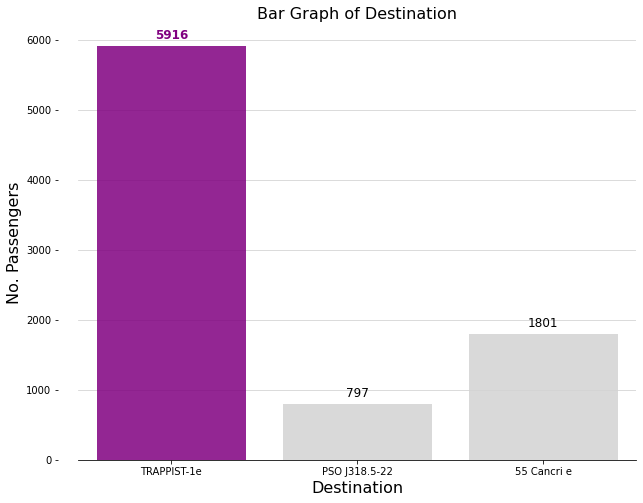

In [19]:
cnt_bar(train, "Destination")

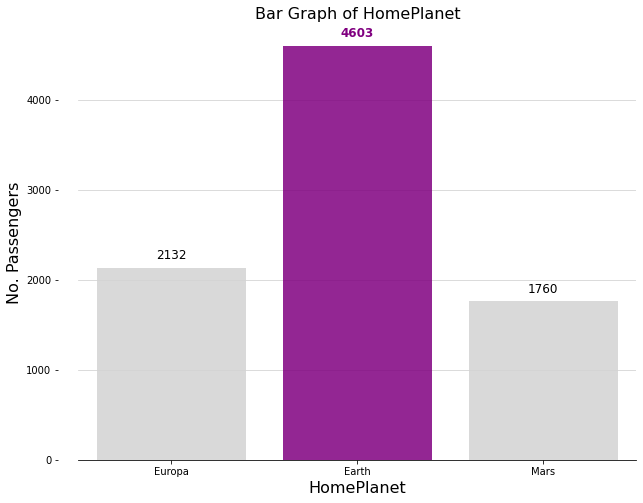

In [20]:
cnt_bar(train, "HomePlanet")

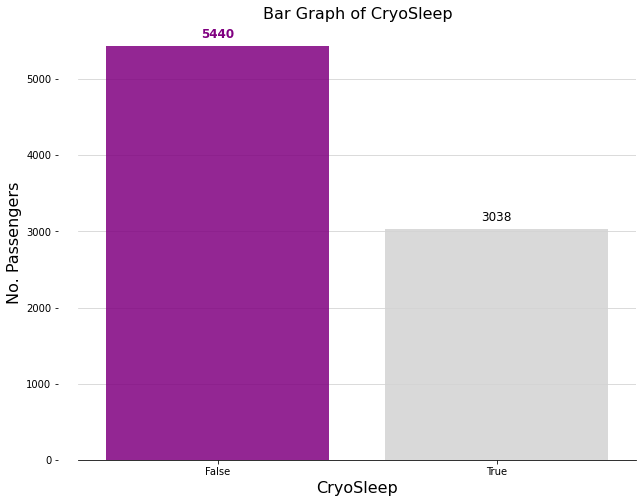

In [21]:
cnt_bar(train, "CryoSleep")

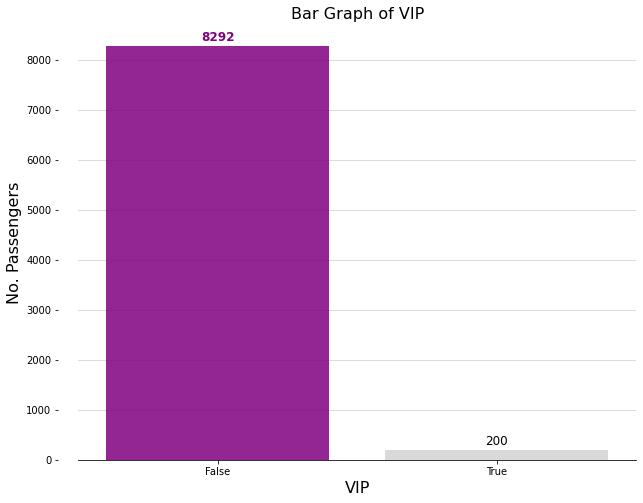

In [22]:
cnt_bar(train, "VIP")

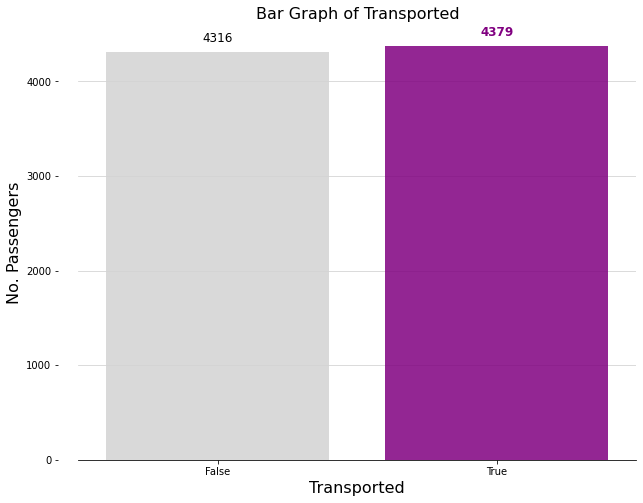

In [23]:
cnt_bar(train, "Transported")

<AxesSubplot:xlabel='HomePlanet', ylabel='Transported'>

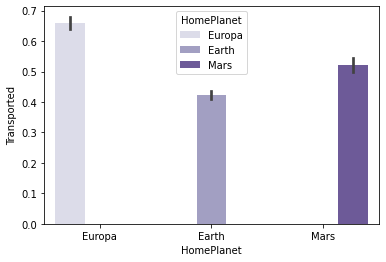

In [24]:
sns.barplot(x = 'HomePlanet',y = 'Transported',hue = 'HomePlanet',data = train, palette = "Purples")

- Passengers from europa are the most Transported

<AxesSubplot:xlabel='HomePlanet', ylabel='VIP'>

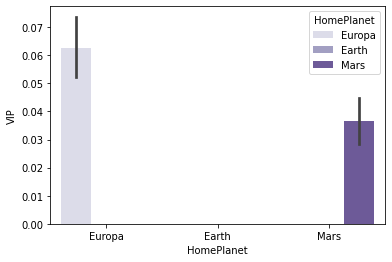

In [25]:
sns.barplot(x = 'HomePlanet',y = 'VIP',hue = 'HomePlanet',data = train, palette = "Purples")

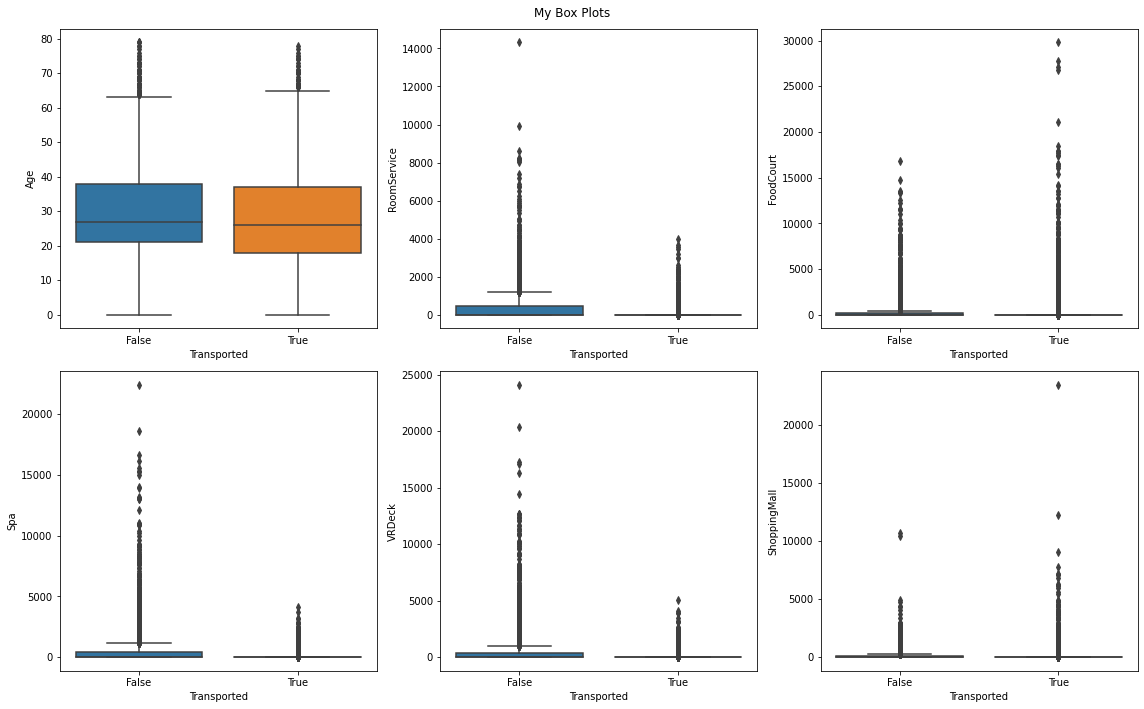

In [26]:
fig, ax = plt.subplots(2, 3, figsize=(16, 10)) # 그래프의 행과 열 지정 및, 이미지 사이즈 지정
data = train.copy()
# data[numeric_features.columns].columns[0:]
for i, col in enumerate(data[numeric_features.columns].columns[0:]): # 좌표 평면 지정
    # print(i, col)
    if i <= 2:
        sns.boxplot(x=data["Transported"], y=data[col], ax=ax[0,i]) # 1행 좌표 평면
    else: 
        sns.boxplot(x=data["Transported"], y=data[col], ax=ax[1,i-4]) # 5행 좌표 평면
fig.suptitle('My Box Plots')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

- RoomService, FoodCourt, Spa, VRDeck, ShoppingMall 은 수치가 아닌것으로 보인다.

In [27]:
train['RoomService'].value_counts()

0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: RoomService, Length: 1273, dtype: int64

In [28]:
train['FoodCourt'].value_counts()

0.0       5456
1.0        116
2.0         75
3.0         53
4.0         53
          ... 
3846.0       1
5193.0       1
312.0        1
827.0        1
4688.0       1
Name: FoodCourt, Length: 1507, dtype: int64

In [29]:
train['Spa'].value_counts()

0.0       5324
1.0        146
2.0        105
5.0         53
3.0         53
          ... 
273.0        1
2581.0       1
2948.0       1
3778.0       1
1643.0       1
Name: Spa, Length: 1327, dtype: int64

- 위 데이터는 연속형 데이터라고 보기에는 비연속형 수치 데이터인 것을 확인

# Step3. 데이터 전처리
- Feature Engineering
- 머신러닝 모형을 돌리기 위해서 표준화, 원핫-인코딩 등
- 파생변수 (도출변수) 만들기


- 불필요한 변수들을 제거 한다

In [30]:
train['Name'].value_counts()

Gollux Reedall        2
Elaney Webstephrey    2
Grake Porki           2
Sus Coolez            2
Apix Wala             2
                     ..
Jamela Griffy         1
Hardy Griffy          1
Salley Mckinn         1
Mall Frasp            1
Propsh Hontichre      1
Name: Name, Length: 8473, dtype: int64

In [31]:
train['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [32]:
remove_cols = ['PassengerId', 'Name', 'Cabin']
PassengerId = test['PassengerId']

print("Before:", train.shape, test.shape)
train = train.drop(remove_cols, axis=1)
test = test.drop(remove_cols, axis=1)

print("After:", train.shape, test.shape)

Before: (8693, 14) (4277, 13)
After: (8693, 11) (4277, 10)


- 아까 찾은 결측치 처리하기
- 결측치를 처리하기 위해 가장 쉬운 방법은 sklearn.impute 내에서의 SimpleImputer 클래스를 활용하는 것이다.
- train의 결측치 패턴을 파악한 후, train및 test결과에도 적용해야한다.
    + 반드시 이렇게 해야한다. Data Leakage 방지

In [33]:
print(f'\033[31m') # 문자색 지정
print((train.isnull().sum().sort_values(ascending = False))) # 내림차순 정렬, 결측치 합
print(f'\033[32m')
print((test.isnull().sum().sort_values(ascending = False)))


CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64

FoodCourt       106
Spa             101
ShoppingMall     98
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
dtype: int64


In [34]:
from sklearn.impute import SimpleImputer

imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
STRATEGY = 'median'

imputer = SimpleImputer(strategy=STRATEGY)
imputer.fit(train[imputer_cols])
train[imputer_cols] = imputer.transform(train[imputer_cols])
test[imputer_cols] = imputer.transform(test[imputer_cols])

print(f'\033[4m train :\n', train.isnull().sum())
print('')
print(f'\033[4m test :\n', test.isnull().sum())

 train :
 HomePlanet      201
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

 test :
 HomePlanet      87
CryoSleep       93
Destination     92
Age              0
VIP             93
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
dtype: int64


In [35]:
imputer_cols = ["HomePlanet", "CryoSleep", "Destination", "VIP"]
STRATEGY = 'most_frequent'


imputer = SimpleImputer(strategy=STRATEGY)
imputer.fit(train[imputer_cols])
train[imputer_cols] = imputer.transform(train[imputer_cols])
test[imputer_cols] = imputer.transform(test[imputer_cols])

print(f'\033[4m train :\n', train.isnull().sum())
print('')
print(f'\033[4m test :\n', test.isnull().sum())

 train :
 HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

 test :
 HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64


- 결측치를 처리하였다

# Categorical Feature Encoding
- 머신러닝 알고리즘은 수식으로 구성이 되어 있기 때문에 문자열의 경우 인코딩으로 변환을 주어야 한다.

- 크게 두가지 방법이 존재한다.

  + Ordinal Encoding
    + 점수 : 0.78770
  + Onehot Encoding
    + 점수 : 0.78840
  + pd.get_dummies
    + 점수 : 0.78840
-크게 두가지 결론을 얻을 수 있었음
 + 첫째, 본 데이터에서는 OneHotEncoding 방식이 Ordinal Encoding 보다 좋았음.
 + 둘째, Onehot Encoding 방식과 pd.get_dummies 방식 차이는 없었음

In [36]:
'''
from sklearn.preprocessing import OrdinalEncoder

# Target 데이터는 1과 0으로 바꿈
train['Transported'] = train_dat['Transported'].map({True: 1, False: 0})
categorical_cols = ["HomePlanet", "CryoSleep", "Destination", "VIP"]

ordinal_encoder = OrdinalEncoder()
train[categorical_cols] = ordinal_encoder.fit_transform(train[categorical_cols])
test[categorical_cols] = ordinal_encoder.fit_transform(test[categorical_cols])

train.info()
'''

'\nfrom sklearn.preprocessing import OrdinalEncoder\n\n# Target 데이터는 1과 0으로 바꿈\ntrain[\'Transported\'] = train_dat[\'Transported\'].map({True: 1, False: 0})\ncategorical_cols = ["HomePlanet", "CryoSleep", "Destination", "VIP"]\n\nordinal_encoder = OrdinalEncoder()\ntrain[categorical_cols] = ordinal_encoder.fit_transform(train[categorical_cols])\ntest[categorical_cols] = ordinal_encoder.fit_transform(test[categorical_cols])\n\ntrain.info()\n'

- 이번에는 Onehot Encoding을 적용해본다. 이 때, pd.get_dummies()방식을 사용한다

In [37]:
'''
# Target 데이터는 1과 0으로 바꿈
train['Transported'] = train['Transported'].map({True: 1, False: 0})
categorical_cols = ["HomePlanet", "CryoSleep", "Destination", "VIP"]

train = pd.get_dummies(train)
test = pd.get_dummies(test)
train.info()
'''

'\n# Target 데이터는 1과 0으로 바꿈\ntrain[\'Transported\'] = train[\'Transported\'].map({True: 1, False: 0})\ncategorical_cols = ["HomePlanet", "CryoSleep", "Destination", "VIP"]\n\ntrain = pd.get_dummies(train)\ntest = pd.get_dummies(test)\ntrain.info()\n'

- 이번에는 OneHoeEncoder 메서드를 사용해본다.

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Target 데이터는 1과 0으로 바꿈
train['Transported'] = train['Transported'].map({True: 1, False: 0})
categorical_cols = ["HomePlanet", "CryoSleep", "Destination", "VIP"]

transformer = make_column_transformer(
    (OneHotEncoder(), categorical_cols),
    remainder='passthrough')

train_transformed = transformer.fit_transform(train[categorical_cols])
train_transformed_df = pd.DataFrame(train_transformed, columns=transformer.get_feature_names_out())
train = pd.concat([train, train_transformed_df], axis = 1)
train = train.drop(categorical_cols, axis = 1)

test_transformed = transformer.fit_transform(test[categorical_cols])
test_transformed_df = pd.DataFrame(test_transformed, columns=transformer.get_feature_names_out())
test = pd.concat([test, test_transformed_df], axis = 1)
test = test.drop(categorical_cols, axis = 1)

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       8693 non-null   float64
 1   RoomService                               8693 non-null   float64
 2   FoodCourt                                 8693 non-null   float64
 3   ShoppingMall                              8693 non-null   float64
 4   Spa                                       8693 non-null   float64
 5   VRDeck                                    8693 non-null   float64
 6   Transported                               8693 non-null   int64  
 7   onehotencoder__HomePlanet_Earth           8693 non-null   float64
 8   onehotencoder__HomePlanet_Europa          8693 non-null   float64
 9   onehotencoder__HomePlanet_Mars            8693 non-null   float64
 10  onehotencoder__CryoSleep_False      

In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       4277 non-null   float64
 1   RoomService                               4277 non-null   float64
 2   FoodCourt                                 4277 non-null   float64
 3   ShoppingMall                              4277 non-null   float64
 4   Spa                                       4277 non-null   float64
 5   VRDeck                                    4277 non-null   float64
 6   onehotencoder__HomePlanet_Earth           4277 non-null   float64
 7   onehotencoder__HomePlanet_Europa          4277 non-null   float64
 8   onehotencoder__HomePlanet_Mars            4277 non-null   float64
 9   onehotencoder__CryoSleep_False            4277 non-null   float64
 10  onehotencoder__CryoSleep_True       

# Step4. 머신러닝 모형 개발
- 모형쓸거아냐 모형에 대한 설명이 들어가 있어야 함
- 모형 1-2개 정도만 써라
- 교차검증, 하이퍼파라미터튜닝, 등등 훈련데이터 등등

- 독립변수와 종속변수를 구분해야 한다.

In [41]:
X_cols = test.columns
X = train[X_cols].to_numpy()
y = train['Transported'].to_numpy()

- 훈련데이터, 검증데이터 분리
- 교차검증 3회 실시

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 42 )
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((6085, 16), (2608, 16), (6085,), (2608,))

- 이번에는 LightGBM 클래스를 부른 후 모형을 학습한다.

In [43]:
'''
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
lgb
'''

'\nfrom lightgbm import LGBMClassifier\n\nlgb = LGBMClassifier(random_state=42)\nlgb\n'

# Model Selection
- Ref. https://www.kaggle.com/code/samuelcortinhas/spaceship-titanic-a-complete-guide
- 그리드 서치를 적용함.
- 4차시도 : 0.79097 (미 적용 시 : 0.78840)
  - 큰 차이는 일어나지 않음
  - 그러나 코드는 많이 작성...;;;

## 모형 옵션 선택
- 아래와 같은 모형을 정의한다.

In [44]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

# Classifiers
classifiers = {
    "LogisticRegression" : LogisticRegression(random_state=0),
    "KNN" : KNeighborsClassifier(),
    "RandomForest" : RandomForestClassifier(random_state=0),
    "LGBM" : LGBMClassifier(random_state=0)
}

In [45]:
# Grids for grid search
LR_grid = {'penalty': ['l1','l2'],
           'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
           'max_iter': [50, 100, 150]}

KNN_grid = {'n_neighbors': [3, 5, 7, 9],
            'p': [1, 2]}

RF_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
        'max_depth': [4, 6, 8, 10, 12]}

boosted_grid = {'n_estimators': [50, 100, 150, 200],
        'max_depth': [4, 8, 12],
        'learning_rate': [0.05, 0.1, 0.15]}

# Dictionary of all grids
grid = {
    "LogisticRegression" : LR_grid,
    "KNN" : KNN_grid,
    "RandomForest" : RF_grid,
    "LGBM" : boosted_grid
}

- 불러온 모형과 그리드 서치를 각각 개별적으로 정의하는 코드를 작성한다.
- 해당 결과는 모두 데이터프레임에 담도록 한다.

In [46]:
# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
import time

i=0
clf_best_params=classifiers.copy()
valid_scores=pd.DataFrame({'Classifer':classifiers.keys(), 'Validation accuracy': np.zeros(len(classifiers)), 'Training time': np.zeros(len(classifiers))})
for key, classifier in classifiers.items():
    start = time.time()
    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None)

    # Train and score
    clf.fit(X_train, y_train)
    valid_scores.iloc[i,1]=clf.score(X_val, y_val)

    # Save trained model
    clf_best_params[key]=clf.best_params_
    
    # Print iteration and training time
    stop = time.time()
    valid_scores.iloc[i,2]=np.round((stop - start)/60, 2)
    
    print('Model:', key)
    print('Training time (mins):', valid_scores.iloc[i,2])
    print('')
    i+=1

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Model: LogisticRegression
Training time (mins): 0.07

Model: KNN
Training time (mins): 0.06

Model: RandomForest
Training time (mins): 0.75

Model: LGBM
Training time (mins): 0.22



- 4개 모형에 대한 모형 개발 속도 및 정확도 평가지표를 확인한다.

In [47]:
valid_scores 

,Classifer,Validation accuracy,Training time
0,LogisticRegression,0.778758,0.07
1,KNN,0.777991,0.06
2,RandomForest,0.790644,0.75
3,LGBM,0.792561,0.22


- 그리드 서치를 통해 얻언내 지표 중 가장 좋은 파라미터를 찾는다.

In [48]:
clf_best_params

{'LogisticRegression': {'C': 1, 'max_iter': 150, 'penalty': 'l2'},
 'KNN': {'n_neighbors': 9, 'p': 2},
 'RandomForest': {'max_depth': 10, 'n_estimators': 50},
 'LGBM': {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 50}}

- 가장 좋은 모형을 적용한다.

In [49]:
# Classifiers
best_classifiers = {
    "RandomForest" : RandomForestClassifier(**clf_best_params["RandomForest"], random_state=0),
    "LGBM" : LGBMClassifier(**clf_best_params["LGBM"], random_state=0)
}

- 이번에는 10겹의 교차검증을 실시한다.

In [50]:
# Number of folds in cross validation
FOLDS=10

preds=np.zeros(len(test))
for key, classifier in best_classifiers.items():
    start = time.time()
    
    # 5-fold cross validation
    cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=0)
    
    score=0
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        # Get training and validation sets
        X_train, X_valid = X[train_idx], X[val_idx]
        y_train, y_valid = y[train_idx], y[val_idx]

        # Train model
        clf = classifier
        clf.fit(X_train, y_train)

        # Make predictions and measure accuracy
        preds += clf.predict_proba(test)[:,1]
        score += clf.score(X_valid, y_valid)

    # Average accuracy    
    score=score/FOLDS
    
    # Stop timer
    stop = time.time()

    # Print accuracy and time
    print('Model:', key)
    print('Average validation accuracy:', np.round(100*score,2))
    print('Training time (mins):', np.round((stop - start)/60,2))
    print('')
    
# Ensemble predictions
preds=preds/(FOLDS*len(best_classifiers))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has featu

Model: RandomForest
Average validation accuracy: 79.64
Training time (mins): 0.06

Model: LGBM
Average validation accuracy: 79.48
Training time (mins): 0.01



# Step5. 모형 평가
- 훈련데이터를 쪼갠다. 훈련데이터 + 검증데이터 가지고 평가
- 테스트 데이터 건드는거 아님
- 정확도 비교
- 혼동행렬 (Confusion Martix) 설명


- 먼저 cross_validate()를 활용한다.

In [51]:
"""
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

splitter = StratifiedKFold(n_splits = 5, shuffle = True, random_state=42)
scores = cross_validate(lgb, X_train, y_train, return_train_score = True, cv=splitter)

print("train Acc.", np.mean(scores['train_score']))
print("test Acc.", np.mean(scores['test_score']))
"""

'\nfrom sklearn.model_selection import StratifiedKFold\nfrom sklearn.model_selection import cross_validate\n\nsplitter = StratifiedKFold(n_splits = 5, shuffle = True, random_state=42)\nscores = cross_validate(lgb, X_train, y_train, return_train_score = True, cv=splitter)\n\nprint("train Acc.", np.mean(scores[\'train_score\']))\nprint("test Acc.", np.mean(scores[\'test_score\']))\n'

- 이번에는 검증 데이터를 활용하여 정확도를 예상해본다.

In [52]:
"""
from sklearn.metrics import accuracy_score

lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_val)
print("Acc.", accuracy_score(y_val, y_pred))
"""

'\nfrom sklearn.metrics import accuracy_score\n\nlgb.fit(X_train, y_train)\ny_pred = lgb.predict(X_val)\nprint("Acc.", accuracy_score(y_val, y_pred))\n'

# Step6. 제출


In [53]:
"""
test_preds = lgb.predict(test_data.to_numpy())
submission['Transported'] = test_preds.astype("bool")
submission.to_csv("submission.csv",index=False)
submission.head()
"""

# Round predictions to nearest integer
preds=np.round(preds).astype(bool)
submission['Transported'] = preds
submission.to_csv("submission.csv",index=False)
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


# 참고
- 다른 사람의 코드 설명을 보고 쭉 따라쳤어 만약에
- 코드 참조 했다고 명시해야함 노트북 표절 방지
- 코드 링크 걸기
- 저자이름, 글제목, 링크주소 ...

# 마감일
- 04.12 17:40 까지
- 제출 형태
    + 개인 DM으로 등수 그거 캡쳐 리더보드
    + 고용노동부 보고 양식 (다음주에 확인해서 알려주신대)

# 점수표
- 4월 4일, 정확도 0.79097 / 110등/1111팀 